**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [2]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
Dataset = pd.read_csv('C:/Users/Admin/Desktop/Regresión_logisticá/heart_cleveland_upload.csv')

In [5]:
Dataset.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [6]:
# Descripción del dataset
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

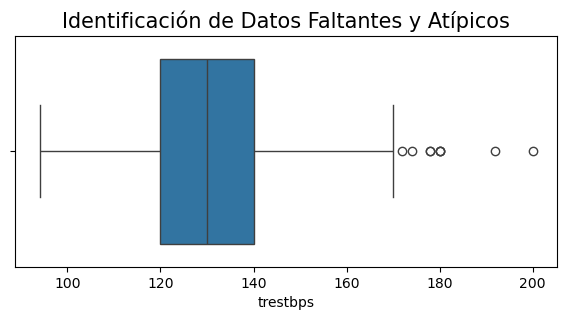

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(7, 3))
sns.boxplot(x=Dataset['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

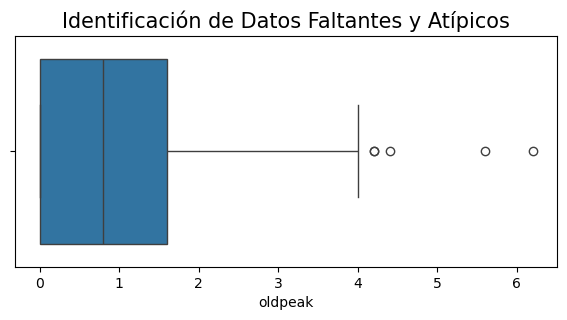

In [9]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=Dataset['oldpeak'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos**

In [85]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age:",Dataset['age'].isin([0]).sum())
print("Cantidad de Registros con cero en trestbps:",Dataset['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en chol:",Dataset['chol'].isin([0]).sum())

Cantidad de Registros con cero en Age: 0
Cantidad de Registros con cero en trestbps: 0
Cantidad de Registros con cero en chol: 0


In [86]:
#Conteo de Datos Atípicos oldpeak

nivel_minimo=0
nivel_maximo=4
Total_Atipicos=((Dataset['oldpeak']<nivel_minimo)|(Dataset['oldpeak']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 5


In [87]:
# Filtra Datos Atípicos oldpeak

Dataset=Dataset[(Dataset['oldpeak']<nivel_maximo)&(Dataset['oldpeak']>nivel_minimo)]

In [88]:
# Validar si se removieron los datos atípicos oldpeak

Total_Atipicos=((Dataset['oldpeak']<nivel_minimo)|(Dataset['oldpeak']>nivel_maximo)).sum()
print("El total de los datos atípicos es {}".format(Total_Atipicos))

El total de los datos atípicos es 0


In [17]:
#Conteo de Datos Atípicos trestbps

nivel_minimo=80
nivel_maximo=180
Total_Atipicos=((Dataset['trestbps']<nivel_minimo)|(Dataset['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [18]:
# Filtra Datos Atípicos trestbps

Dataset=Dataset[(Dataset['trestbps']<nivel_maximo)&(Dataset['trestbps']>nivel_minimo)]

In [19]:
# Validar si se removieron los datos atípicos trestbps

Total_Atipicos=((Dataset['trestbps']<nivel_minimo)|(Dataset['trestbps']>nivel_maximo)).sum()
print("El total de los datos atípicos es {}".format(Total_Atipicos))

El total de los datos atípicos es 0


**3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características # Total de personas con Diabetes**

Característica de interes:
Condition es la variable objetivo para ver la porbabilidad de una persona si la persona es 
diagnósticada de enfermedad cardíaca (0 = No tiene enfermedad, 1 = Tiene enfermedad).
Predecir si una persona puede ser diagnosticada cardíaca o no cardíaca

In [20]:
# Total de personas con Diabetes

Dataset['condition'].value_counts()

condition
0    159
1    133
Name: count, dtype: int64

**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [21]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Dataset.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Condition
Y = Dataset['condition'] # Se cargan los datos de train con los datos de la la columna Condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [22]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
268   48    1   3       122   222    0        2      186      0      0.0   
53    48    1   1       130   245    0        2      180      0      0.2   
208   59    1   3       110   239    0        2      142      1      1.2   
74    70    1   2       160   269    0        0      112      1      2.9   
290   41    1   3       110   172    0        2      158      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
227   57    1   3       110   201    0        0      126      1      1.5   
281   44    1   3       110   197    0        2      177      0      0.0   
205   60    0   3       158   305    0        2      161      0      0.0   
213   58    1   3       114   318    0        1      140      0      4.4   
113   54    0   2       160   201    0        0      163      0      0.0   

     slope  ca  thal  
268      0   0     0  
53       1   0     0  
208      1   1    

In [40]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
126   50    1   2       140   233    0        0      163      0      0.6   
285   43    1   3       150   247    0        0      171      0      1.5   
23    74    0   1       120   269    0        2      121      1      0.2   
173   65    1   3       110   248    0        2      158      0      0.6   
284   43    1   3       115   303    0        0      181      0      1.2   
47    52    1   1       134   201    0        0      158      0      0.8   
275   45    1   3       104   208    0        2      148      1      3.0   
216   58    1   3       128   259    0        2      130      1      3.0   
291   40    1   3       110   167    0        2      114      1      2.0   
156   71    0   3       112   149    0        0      125      0      1.6   
75    69    1   2       140   254    0        2      146      0      2.0   
222   58    1   3       100   234    0        0      156      0      0.1   
70    34    

**5. Entrenar el modelo configurando los diferentes hiperparámetros**

In [23]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [24]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2
257,52,1,3,112,230,0,0,160,0,0.0,0,1,0
51,49,1,1,130,266,0,0,171,0,0.6,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
63,41,1,1,135,203,0,0,132,0,0.0,1,0,1
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2
279,44,1,3,120,169,0,0,144,1,2.8,2,0,1
214,58,1,3,128,216,0,2,131,1,2.2,1,3,2
100,58,1,2,132,224,0,2,173,0,3.2,0,2,2


In [25]:
print (Prediccion)

[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1]


**6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc**

In [26]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.85      0.86        33

    accuracy                           0.88        73
   macro avg       0.88      0.87      0.88        73
weighted avg       0.88      0.88      0.88        73



**7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo**

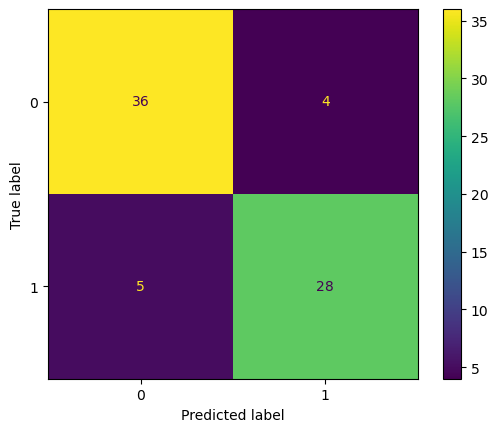

In [27]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

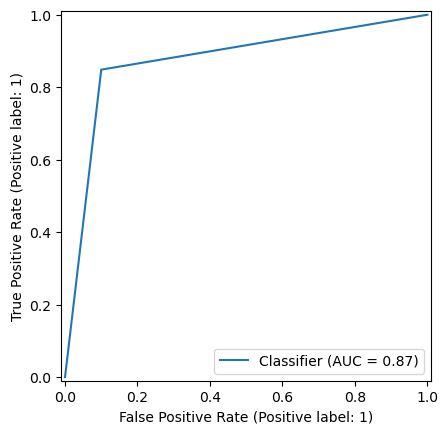

In [29]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()